# Bayes By The Pictures

... inspired by DS Sivia's _Data Analysis: a Bayesian Tutorial_.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [163]:
# these are 1000 numbers generated uniformly randomly from a set of 5 ones and 11 zeroes
data = [0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,1,1,0,1,1,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0]

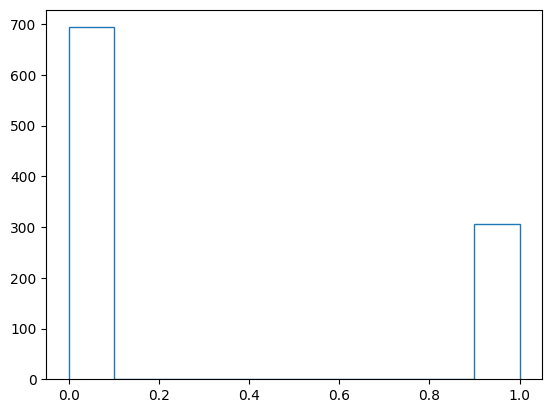

In [4]:
counts, bins = np.histogram(data)
plt.stairs(counts, bins); plt.title = 'Histogram of the counts of the number of pages'

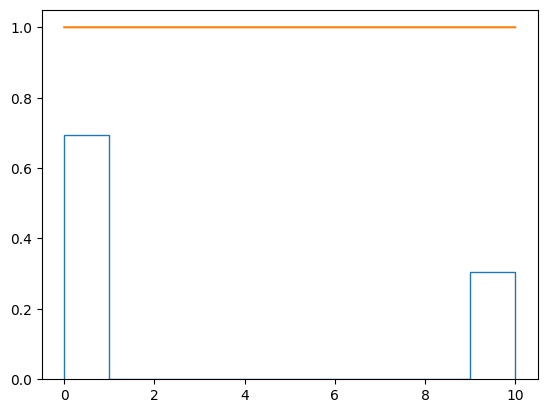

In [56]:
## Constant ignorance
linspace = np.linspace(0,10, 10000)
plt.stairs(np.histogram(data)[0]/1000)
plt.plot(linspace, list(map(lambda x: 1, linspace)))
plt.show()

$$P(X=x)= p^x\cdot (1-p)^{1-x}$$

We'll apply the Bayes theorem for a Bernoulli parametrized by $p$ so that $P(X=1)=p$.

$$ f_p(t|x_1,\ldots, x_k) = \left(\prod_{i=1}^k P(X=x_i|t)\right)\cdot f_p(t)$$
$$ f_p(t|x_1,x_2) = P(X=x_1|t)\cdot P(X=x_2|t)\cdot f_p(t)$$

$$ f_p(t|x_1,x_2) = (1-p)\cdot p\cdot f_p(t)$$

In [107]:
def px(x,t):
    return t**x * (1-t)**(1-x)
    
def fp(t,n):
    prod = 1
    for i in range(1,n):
        prod = prod * px(data[i],t)
    return 1 * prod
    
def max(n):
    m = 0
    for x in np.linspace(0,1, 10000):
         v = fp(x,n)
         if v>m :
           m = v
    return m


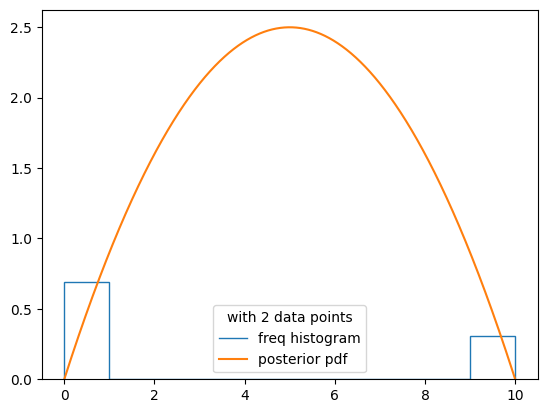

In [158]:
## step 2
linspace = np.linspace(0,10, 10000)
plt.stairs(np.histogram(data)[0]/1000, label='freq histogram')
plt.plot(linspace, list(map(lambda x: (1-x/10)*x*1, linspace)), label='posterior pdf')
plt.legend(title='with 2 data points')
plt.show()

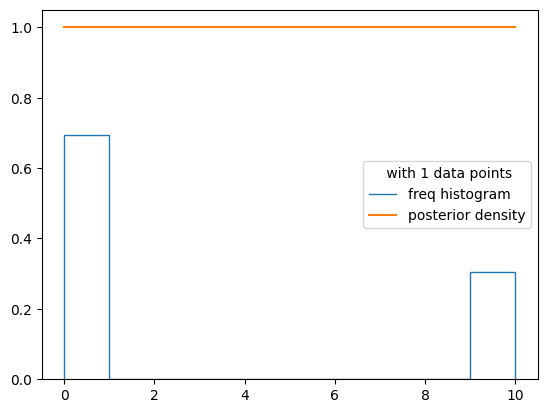

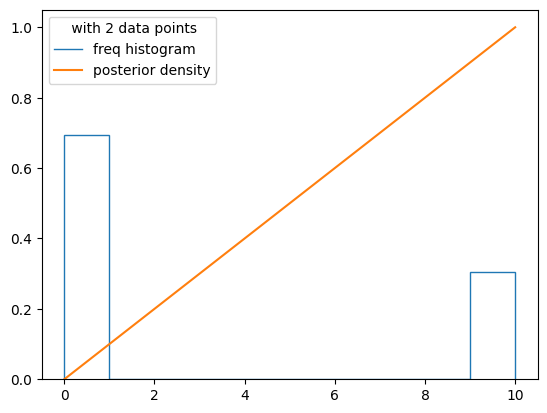

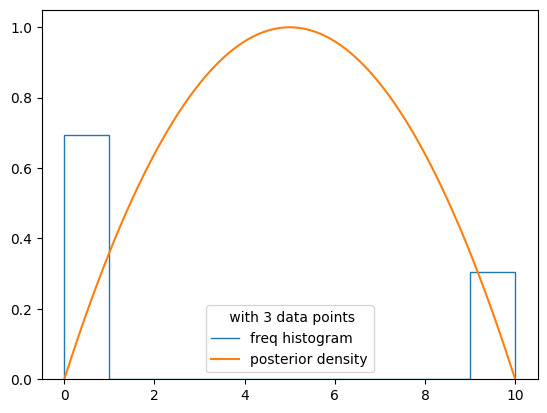

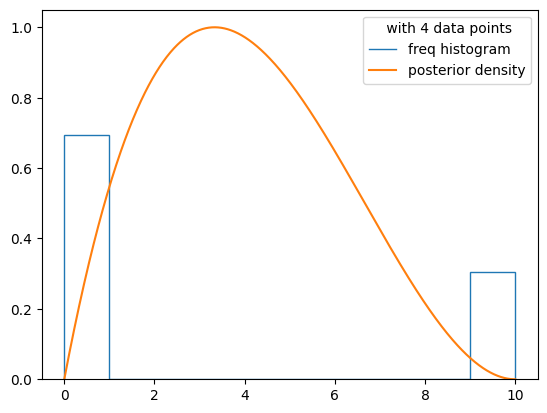

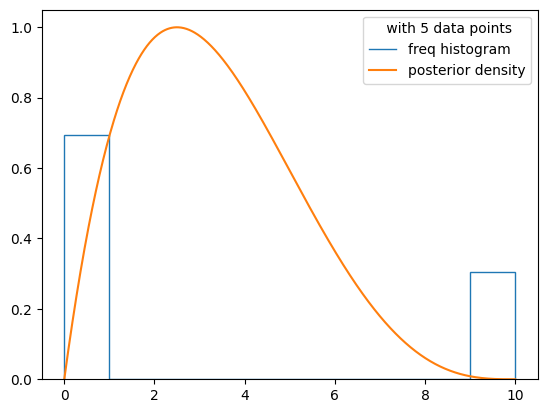

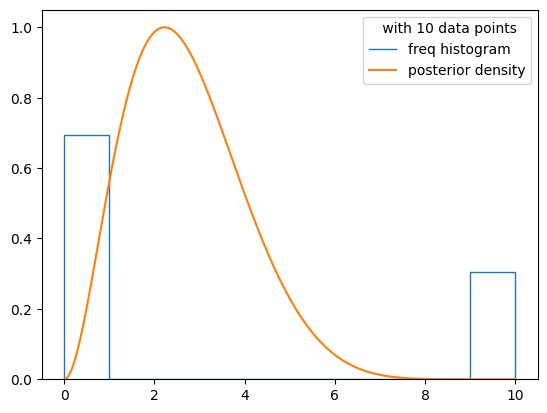

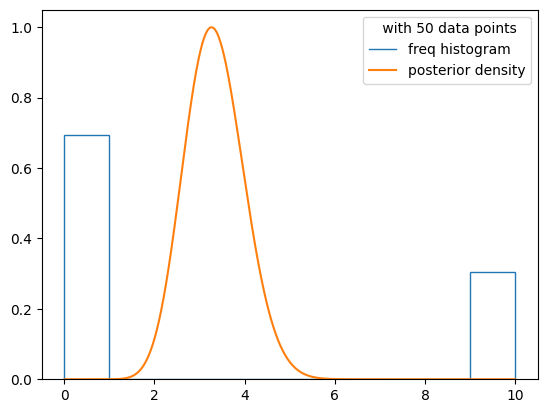

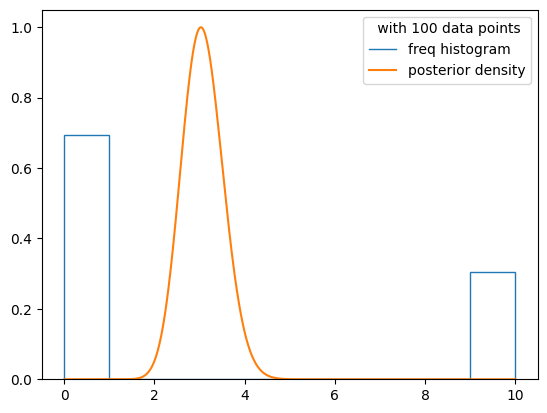

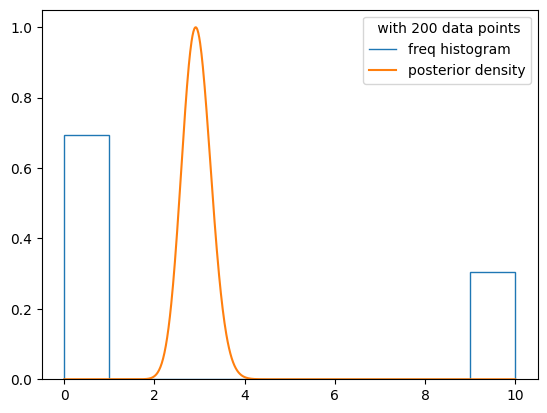

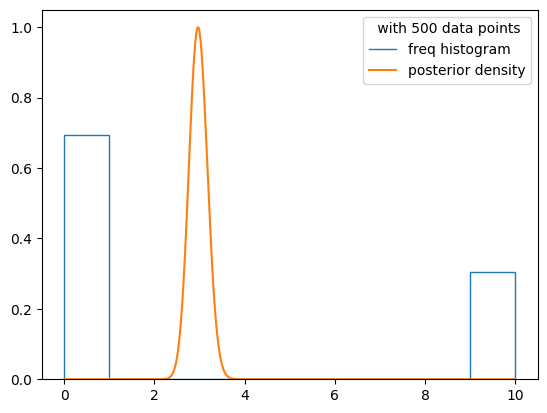

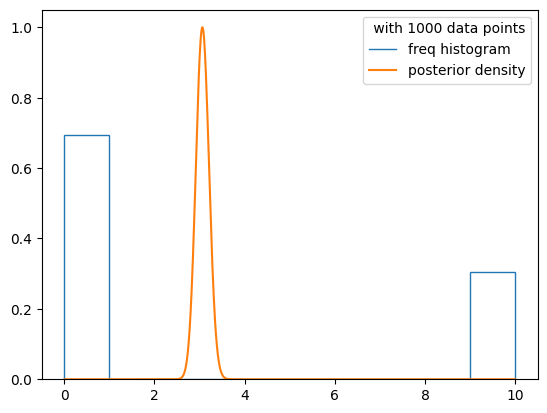

In [159]:
## step n
for n in [1,2,3,4,5, 10, 50, 100, 200, 500, 1000]:
    m = max(n)
    linspace = np.linspace(0,10, 1000)
    plt.stairs(np.histogram(data)[0]/1000, label='freq histogram')
    plt.plot(linspace, list(map(lambda t: fp(t/10,n)/m, linspace)), label='posterior density')
    plt.legend(title=' with ' + str(n) + ' data points')
    plt.show()
